# <center>`SUPERSTORE SALES ANALYSIS USING SQL, PYTHON AND POWER BI`

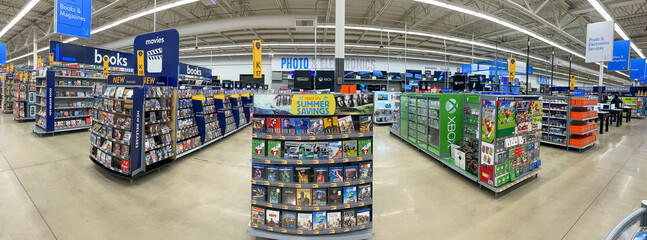

Sales analytics is the practice of using data to generate sales-related insights, including sales history, results, trends and forecasts.

# Contents: 

1. [Data exploration using pyMySQL, pandas, matplotlib and seaborn:](#1.-Data-exploration-using-pyMySQL,-pandas,-matplotlib-and-seaborn:)<br>
   1.1 [Product_based_EDA](#1.1-Product_based_EDA)<br>
   1.2 [Customer based EDA](#1.2-Customer-based-EDA)<br>
   1.3 [Location based EDA](#1.3-Location-based-EDA)<br>
   
   
2. [Product analysis](#2.-Product-analysis)<br>
   2.1 [Product Quantity Analysis using SQL and Pandas](#2.1-Product-Quantity-Analysis-using-SQL-and-Pandas)<br>
   2.2 [Product categories (amount)](#2.2-Product-categories-(amount))<br>
   2.3 [Product sub- category](#2.3-Product-sub--category)<br>
   2.4 [Top 10 product quatities for the whole pelriod](#2.4-Top-10-product-quatities-for-the-whole-pelriod)<br>
   
   
3. [Data manipulation, feature engineering and data cleaning](#3.-Data-manipulation,-feature-engineering-and-data-cleaning)<br>
   3.1 [Sales and profit analysis](#3.1-Sales-and-profit-analysis)<br>
   3.2 [Sales volume and profit per order](#3.2-Sales-volume-and-profit-per-order)<br>
   3.3 [Sale volume and profit per city](#3.3-Sale-volume-and-profit-per-city)<br>
   3.4 [Highest sales for each Region](#3.4-Highest-sales-for-each-Region)<br>
   3.5 [Highest sales record of each product](#3.5-Highest-sales-record-of-each-product)<br>
   3.6 [Year-on-Year Sales](#3.6-Year-on-Year-Sales)<br>
   
   
4. [Analysis of results from Power BI](#4.-Analysis-of-results-from-Power-BI)<br>
   4.1 [Dashboard one](#4.1-Dashboard-one)<br>
   4.2 [Dashboard two](#4.2-Dashboard-two)<br>
   4.3 [Dashboard three](#4.3-Dashboard-three)<br>
   4.4 [Dashboard four](#4.4-Dashboard-four)<br>
   4.5 [Dashboard five](#4.5-Dashboard-five)

# Main objectives of this project:

- To understand the outcome of sales efforts and establish accountability within sales team of the Superstore. <br>


- To get insights from sales and use them to identify key levers of sales processes, prioritise them and improve sales efficiency.

# Tools: 
- __MySQL WORKBENCH:__ For data storage.


- __PYTHON JUPYTER NOTEBOOK:__ For Data Extraction, Data Transformation and Data Loading (ETL).


- __POWER BI:__ For data visualisation in the form of interactive dashboard.

In [68]:
# import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.context("seaborn-darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [69]:
import pymysql

### Configure Jupyter notebook with MySQL workbench:

In [70]:
# load MySQL database information
db_name = "super_store_db"
db_host = "localhost"
db_username = "root"
db_password = "Mark@muli1$"

In [71]:
# create a coonnector between jupyter notebook and MySQL workbencch 
conn = pymysql.connect(host = db_host,
                          port = int(3306),
                          user = 'root',
                          passwd = db_password,
                          db = db_name)

### Extract sample superstore table from MySQL 'super_store' database

In [72]:
super_store_db = 'SELECT * \
                  FROM `sample_-_superstore`'

### Reading MySQL 'Super store table' in pandas DataFrame

In [73]:
pd.read_sql_query(super_store_db, conn).head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [74]:
pd.read_sql_query(super_store_db, conn).columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# 1. Data exploration using pyMySQL, pandas, matplotlib and seaborn:

##  1.1 Product_based_EDA

### 1.1.1 __Distinct_product_categories__

In [75]:
product = 'SELECT \
               DISTINCT `category` AS `Product list`\
           FROM `sample_-_superstore`'
product = pd.read_sql_query(product, conn)
product

,Product list
0,Furniture
1,Office Supplies
2,Technology


In [76]:
product = 'SELECT \
                COUNT(DISTINCT `category`) AS `Product total`\
           FROM `sample_-_superstore`'
product = pd.read_sql_query(product, conn)
product

,Product total
0,3


### 1.1.2 __Distinct product sub-categories__

In [77]:
product = 'SELECT \
                DISTINCT `Sub-Category` AS `Sub-Category list`\
           FROM `sample_-_superstore`'
product = pd.read_sql_query(product, conn)
product.head()

,Sub-Category list
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage


In [78]:
product = 'SELECT \
                COUNT(DISTINCT `Sub-Category`) AS `Sub-Category total`\
           FROM `sample_-_superstore`'
product = pd.read_sql_query(product, conn)
product

,Sub-Category total
0,17


### 1.1.3 __Sales and profits by sub-categories__

In [79]:
product = 'SELECT \
                 DISTINCT `Sub-Category` AS `Sub-Category`, \
                 Sales,  \
                 Profit \
           FROM `sample_-_superstore`\
           GROUP BY 1\
           ORDER BY 2 DESC'
product = pd.read_sql_query(product, conn)
product.head()

,Sub-Category,Sales,Profit
0,Machines,8159.9520,-1359.9920
1,Copiers,959.9840,335.9944
2,Tables,957.5775,-383.0310
3,Phones,907.1520,90.7152
4,Chairs,731.9400,219.5820


### 1.1.4 __Maximum sale and profit by sub-category__

In [80]:
sub_cat_max = 'SELECT \
                 DISTINCT `Sub-Category` AS `Sub-Category`, \
                 MAX(Sales) AS `max sale`,  \
                 MAX(Profit) AS `max profit` \
           FROM `sample_-_superstore`\
           GROUP BY 1\
           ORDER BY 2 DESC'
sub_cat_max = pd.read_sql_query(sub_cat_max, conn)
sub_cat_max.head()

,Sub-Category,max sale,max profit
0,Machines,22638.48,2799.9840
1,Copiers,17499.95,8399.9760
2,Binders,9892.74,4946.3700
3,Supplies,8187.65,327.5060
4,Phones,4548.81,1228.1787


Come up with a barchart for max sales

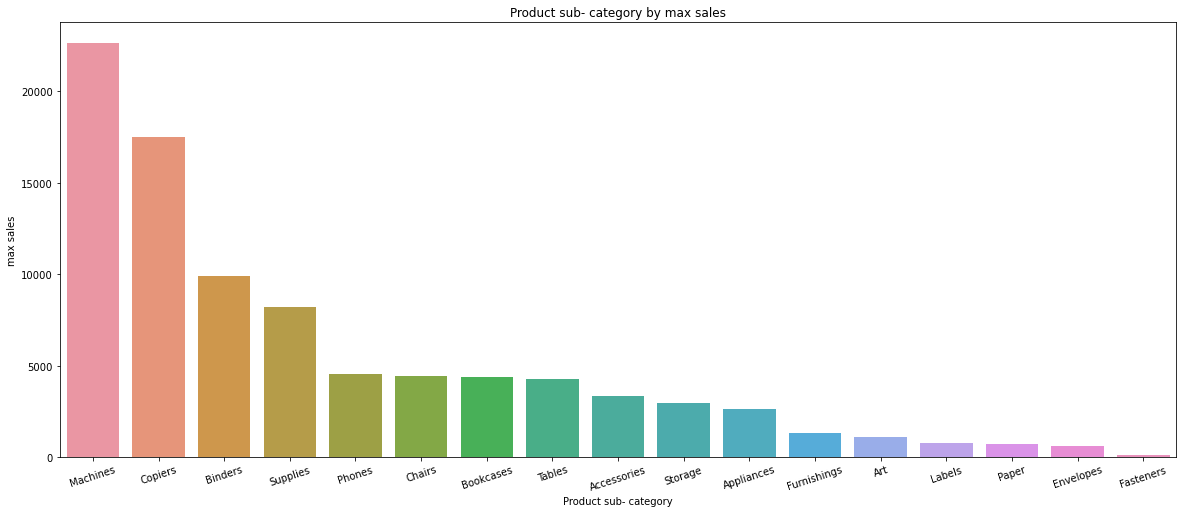

In [81]:
plt.figure(figsize = [20,8])
sns.barplot(x = sub_cat_max['Sub-Category'], y = sub_cat_max['max sale'])
plt.xticks(rotation = 18)
plt.title('Product sub- category by max sales')
plt.xlabel('Product sub- category')
plt.ylabel('max sales')
plt.show()

### - Insight
__Machines__ have the highest sales record of over 20000

Come up the bar-chart for max profit

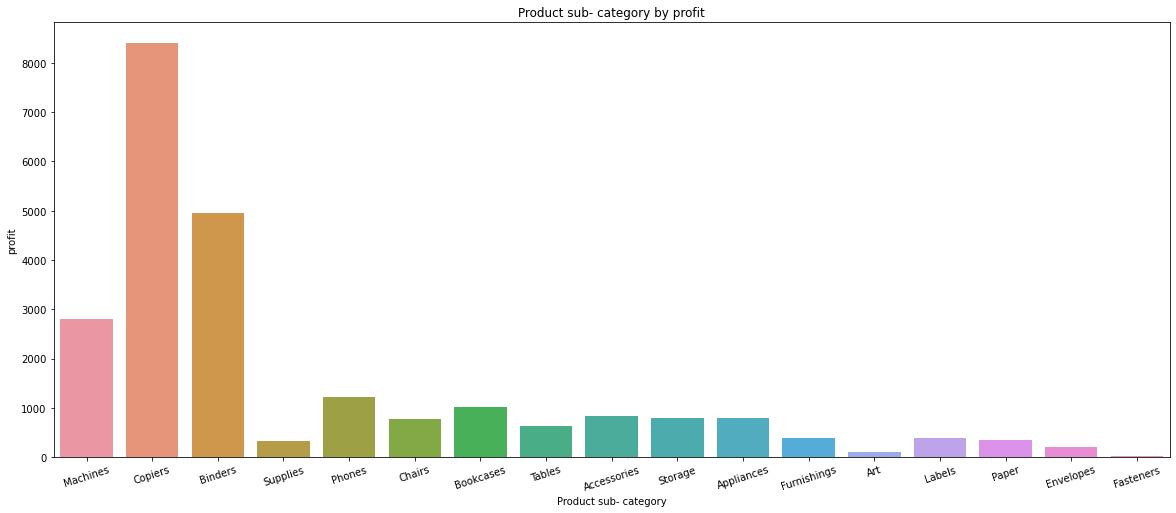

In [82]:
plt.figure(figsize = [20,8])
sns.barplot(x = sub_cat_max['Sub-Category'], y = sub_cat_max['max profit'])
plt.xticks(rotation = 18)
plt.title('Product sub- category by profit')
plt.xlabel('Product sub- category')
plt.ylabel('profit')
plt.show()

### - Insight
__Copiers__ recorded the highest profit of over 8000

### 1.1.5 __Profit and loss by sub-category__

Finding the difference between sales and profit, and adding discounnt to get the order price

In [83]:
profit_loss = 'SELECT \
           `Sub-Category`,(Sales-Profit)+Discount AS Order_price, Sales, profit \
            FROM `sample_-_superstore`\
            GROUP BY `Sub-Category`'
profit_loss = pd.read_sql_query(profit_loss, conn)
profit_loss.head()

,Sub-Category,Order_price,Sales,profit
0,Bookcases,220.0464,261.9600,41.9136
1,Chairs,512.3580,731.9400,219.5820
2,Labels,7.7486,14.6200,6.8714
3,Tables,1341.0585,957.5775,-383.0310
4,Storage,20.0516,22.3680,2.5164


Come up with the barchart and correlation matrix

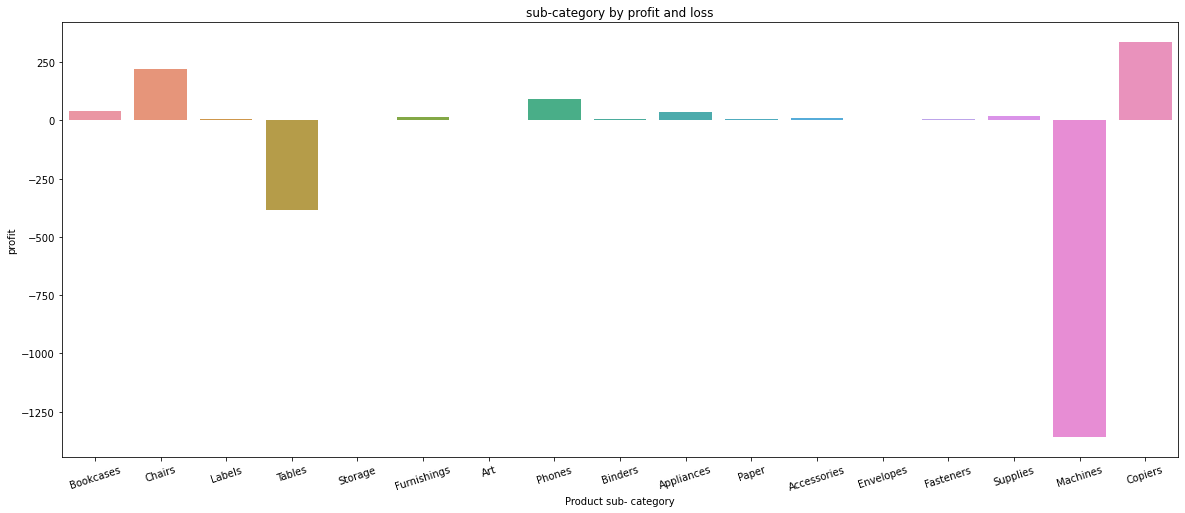

In [84]:
plt.figure(figsize = [20,8])
sns.barplot(x = profit_loss['Sub-Category'], y = profit_loss.profit)
plt.xticks(rotation = 18)
plt.title('sub-category by profit and loss')
plt.xlabel('Product sub- category')
plt.ylabel('profit')
plt.show()

<AxesSubplot:>

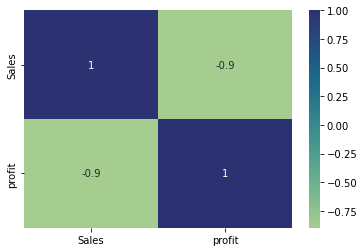

In [85]:
sns.heatmap(profit_loss[['Sales','profit']].corr(), cmap="crest", annot=True)

Extracting products which recorded __profit__

In [86]:
profit_sub_cat = 'SELECT \
           `Sub-Category`,Sales-Profit AS Order_price, Sales, profit\
            FROM `sample_-_superstore`\
            GROUP BY `Sub-Category`\
            HAVING Order_price < Sales'
profit_sub_cat = pd.read_sql_query(profit_sub_cat, conn)
profit_sub_cat.head()

,Sub-Category,Order_price,Sales,profit
0,Bookcases,220.0464,261.960,41.9136
1,Chairs,512.3580,731.940,219.5820
2,Labels,7.7486,14.620,6.8714
3,Storage,19.8516,22.368,2.5164
4,Furnishings,34.6906,48.860,14.1694


Barchart for sub-product by profit

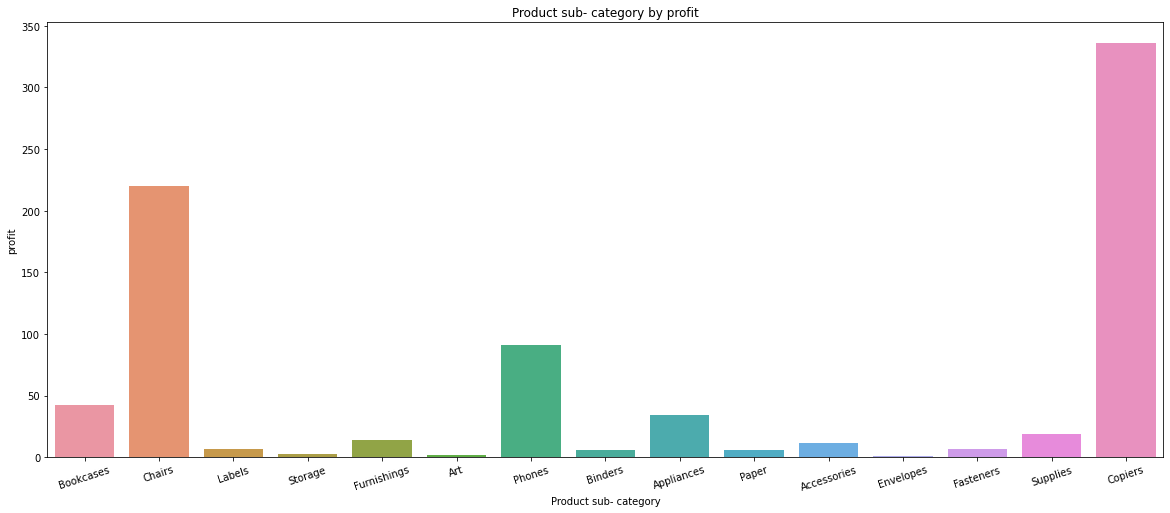

In [87]:
plt.figure(figsize = [20,8])
sns.barplot(x = profit_sub_cat['Sub-Category'], y = profit_sub_cat.profit)
plt.xticks(rotation = 18)
plt.title('Product sub- category by profit')
plt.xlabel('Product sub- category')
plt.ylabel('profit')
plt.show()

### - Insight
__Copiers__ recorded highest profit of over __300__ followed by __Chairs__ with over __200__.<br>
On the overall basis, the superstore's profits were around __53__.

__Extracting products which recorded loss__

In [88]:
loss = 'SELECT \
           `Sub-Category`,(Sales+Discount)-Profit AS Order_price, Sales, profit\
            FROM `sample_-_superstore`\
            GROUP BY `Sub-Category`\
            HAVING Order_price > Sales'
loss = pd.read_sql_query(loss, conn)
loss

,Sub-Category,Order_price,Sales,profit
0,Tables,1341.0585,957.5775,-383.031
1,Machines,9520.3440,8159.9520,-1359.992


Come up with a barchart

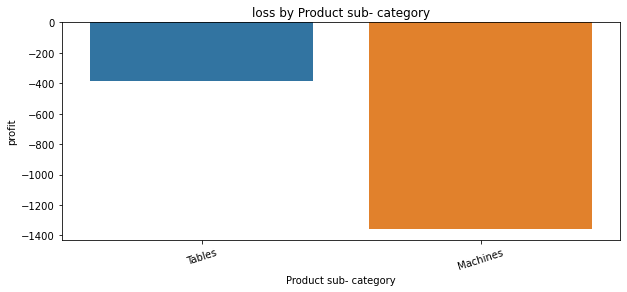

In [89]:
plt.figure(figsize = [10,4])
sns.barplot(x = loss['Sub-Category'], y = loss.profit)
plt.xticks(rotation = 18)
plt.title('loss by Product sub- category')
plt.xlabel('Product sub- category')
plt.ylabel('profit')
plt.show()

### - Insight
__Machines__ recorded highest loss of over __1200__.

## 1.2 Customer based EDA

### 1.2.1 __Distinct customer segments__

In [90]:
Segment = 'SELECT \
               DISTINCT Segment AS `Segment list`\
           FROM `sample_-_superstore`'
Segment = pd.read_sql_query(Segment, conn)
Segment

,Segment list
0,Consumer
1,Corporate
2,Home Office


### 1.2.2 __Sales and profits by customer segment__

In [91]:
Segment = 'SELECT \
                 DISTINCT Segment AS Segment, \
                 Sales,  \
                 Profit \
           FROM `sample_-_superstore`\
           GROUP BY 1\
           ORDER BY 2 DESC'
Segment = pd.read_sql_query(Segment, conn)
Segment.head()

,Segment,Sales,Profit
0,Consumer,261.96,41.9136
1,Home Office,68.81,-123.8580
2,Corporate,14.62,6.8714


### 1.2.3 __Minimum and maximum sale and profit by customer segment__

In [92]:
seg_max = 'SELECT \
                 DISTINCT Segment AS Segment, \
                 MAX(Sales) AS `max sale`,  \
                 MAX(Profit) AS `max profit` \
           FROM `sample_-_superstore`\
           GROUP BY 1\
           ORDER BY 2 DESC'
seg_max = pd.read_sql_query(seg_max, conn)
seg_max.head()

,Segment,max sale,max profit
0,Home Office,22638.48,3919.9888
1,Corporate,17499.95,8399.9760
2,Consumer,13999.96,6719.9808


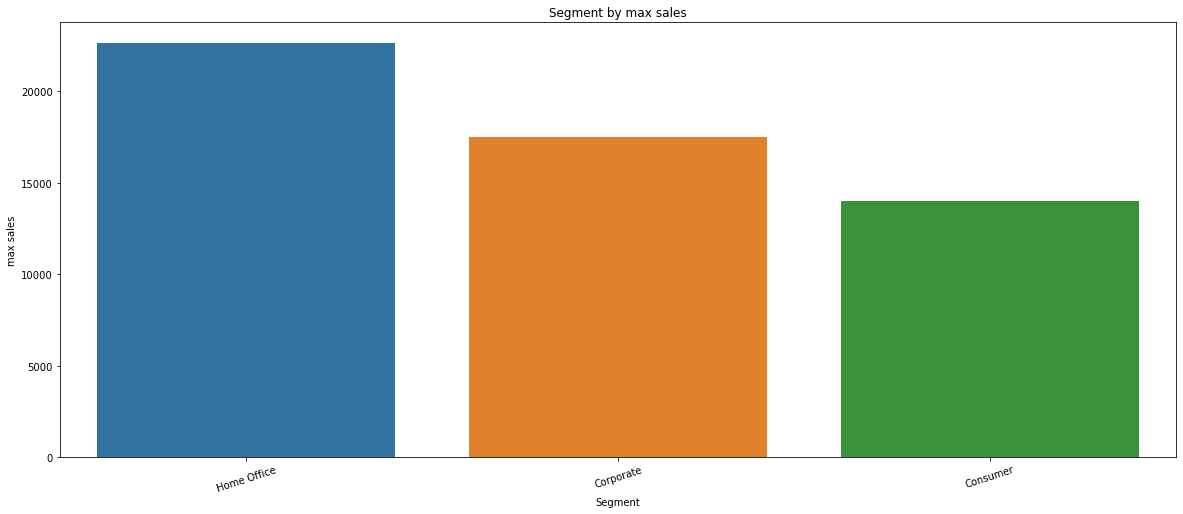

In [93]:
plt.figure(figsize = [20,8])
sns.barplot(x = seg_max['Segment'], y = seg_max['max sale'])
plt.xticks(rotation = 18)
plt.title('Segment by max sales')
plt.xlabel('Segment')
plt.ylabel('max sales')
plt.show()

### - Insight
__Home office__ customer segment recorded highest sales of over __20000__

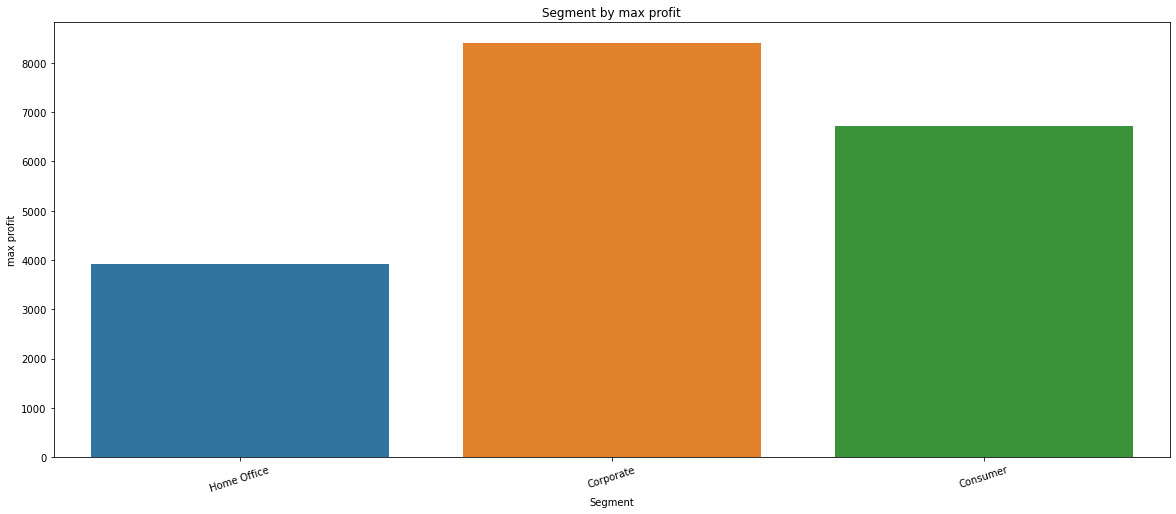

In [94]:
plt.figure(figsize = [20,8])
sns.barplot(x = seg_max['Segment'], y = seg_max['max profit'])
plt.xticks(rotation = 18)
plt.title('Segment by max profit')
plt.xlabel('Segment')
plt.ylabel('max profit')
plt.show()

### - Insight
__Corporate__ Customers recorded highest profit of over __8000__.

### 1.2.4 __Profit and loss by customer segment__

In [95]:
Segment = 'SELECT \
           Segment,(Sales-Profit)+Discount AS Order_price, Sales, profit \
            FROM `sample_-_superstore`\
            GROUP BY Segment'
Segment = pd.read_sql_query(Segment, conn)
Segment.head()

,Segment,Order_price,Sales,profit
0,Consumer,220.0464,261.96,41.9136
1,Corporate,7.7486,14.62,6.8714
2,Home Office,193.4680,68.81,-123.8580


Come up with the barchart and correlation matrix

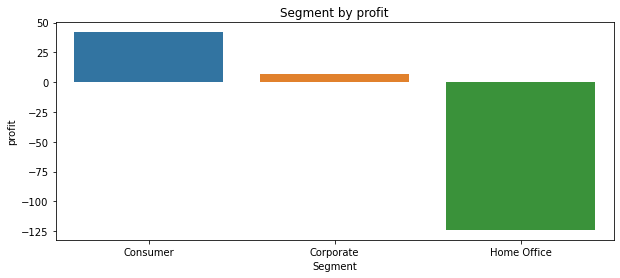

In [96]:
plt.figure(figsize = [10,4])
sns.barplot(x = Segment['Segment'], y = Segment.profit)
plt.xticks(rotation = 0)
plt.title('Segment by profit')
plt.xlabel('Segment')
plt.ylabel('profit')
plt.show()

<AxesSubplot:>

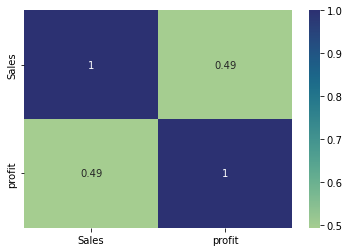

In [97]:
sns.heatmap(Segment[['Sales','profit']].corr(), cmap="crest", annot=True)

Extracting customer segments which recorded __profit__

In [98]:
seg_profit = 'SELECT \
           Segment,Sales-Profit AS Order_price, Sales, profit\
            FROM `sample_-_superstore`\
            GROUP BY `Segment`\
            HAVING Order_price < Sales'
seg_profit = pd.read_sql_query(seg_profit, conn)
seg_profit.head()

,Segment,Order_price,Sales,profit
0,Consumer,220.0464,261.96,41.9136
1,Corporate,7.7486,14.62,6.8714


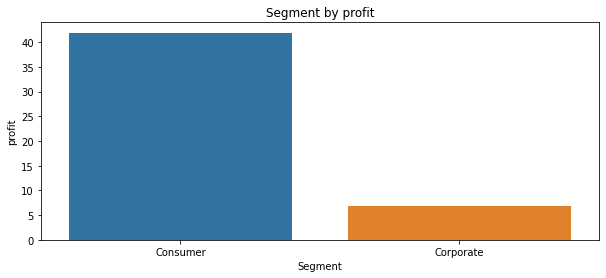

In [99]:
plt.figure(figsize = [10,4])
sns.barplot(x = seg_profit['Segment'], y = seg_profit.profit)
plt.xticks(rotation = 0)
plt.title('Segment by profit')
plt.xlabel('Segment')
plt.ylabel('profit')
plt.show()

### - Insight
__Consumer__ segment recorded highet profit of about __60__.<br>
__Home office__ segment recorded the highest loss of about __125__.

   ## 1.3 Location based EDA

### 1.3.1 __Distinct states__

In [100]:
State = 'SELECT \
               DISTINCT State AS `State list`\
           FROM `sample_-_superstore`'
State = pd.read_sql_query(State, conn)
State.head()

,State list
0,Kentucky
1,California
2,Florida
3,North Carolina
4,Washington


### 1.3.2 __Sales and profits by city__

In [101]:
State = 'SELECT \
                 DISTINCT State AS State, \
                 Sales,  \
                 Profit \
           FROM `sample_-_superstore`\
           GROUP BY 1\
           ORDER BY 2 DESC'
State = pd.read_sql_query(State, conn)
State.head()

,State,Sales,Profit
0,Montana,2999.9500,1379.9770
1,Wyoming,1603.1360,100.1960
2,Arizona,1113.0240,111.3024
3,Florida,957.5775,-383.0310
4,Mississippi,866.4000,225.2640


### 1.3.3 __Minimum and minimum sale and profit__

In [102]:
sate_max = 'SELECT \
                 DISTINCT State AS State, \
                 MAX(Sales) AS `max sale`,  \
                 MAX(Profit) AS `max profit` \
           FROM `sample_-_superstore`\
           GROUP BY 1\
           ORDER BY 2 DESC'
sate_max = pd.read_sql_query(sate_max, conn)
sate_max.head()

,State,max sale,max profit
0,Florida,22638.480,327.5922
1,Indiana,17499.950,8399.9760
2,Washington,13999.960,6719.9808
3,New York,11199.968,3919.9888
4,Delaware,10499.970,5039.9856


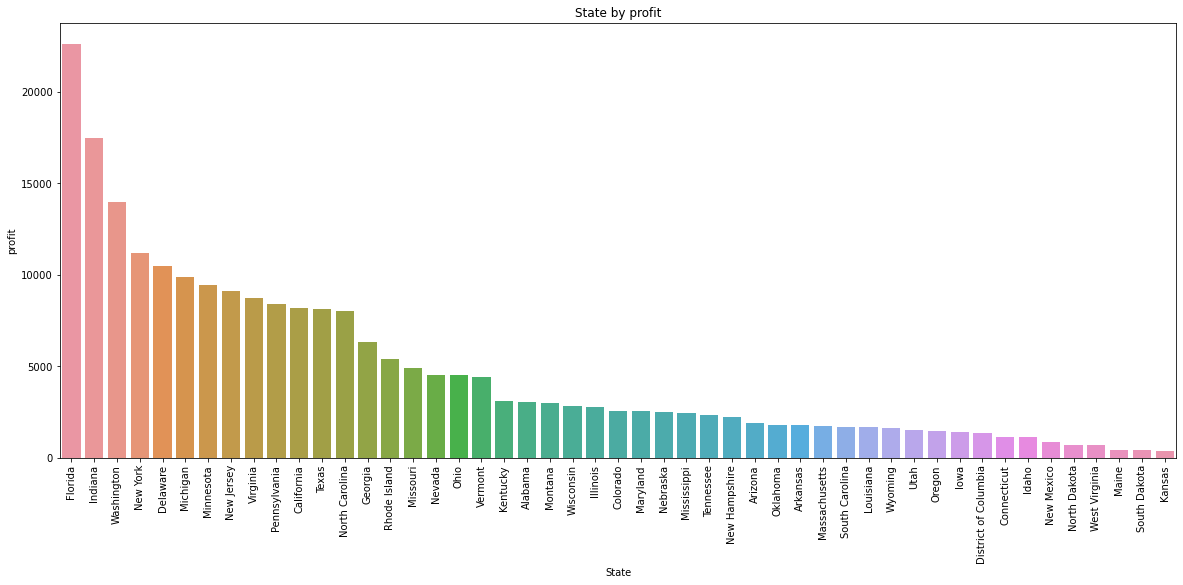

In [103]:
plt.figure(figsize = [20,8])
sns.barplot(x = sate_max['State'], y = sate_max['max sale'])
plt.xticks(rotation = 90)
plt.title('State by profit')
plt.xlabel('State')
plt.ylabel('profit')
plt.show()

## - Insight
__Florida__ recorded highest maximum sales of over __20000__.

### 1.3.4 __Profit and loss by city__

In [104]:
State= 'SELECT \
           State,(Sales-Profit)+Discount AS Order_price, Sales, profit \
            FROM `sample_-_superstore`\
            GROUP BY State'
State = pd.read_sql_query(State, conn)
State.head()

,State,Order_price,Sales,profit
0,Kentucky,220.0464,261.9600,41.9136
1,California,7.7486,14.6200,6.8714
2,Florida,1341.0585,957.5775,-383.0310
3,North Carolina,10.3088,15.5520,5.4432
4,Washington,275.5838,407.9760,132.5922


In [105]:
State.shape

(49, 4)

Barchart and correlation  matrix

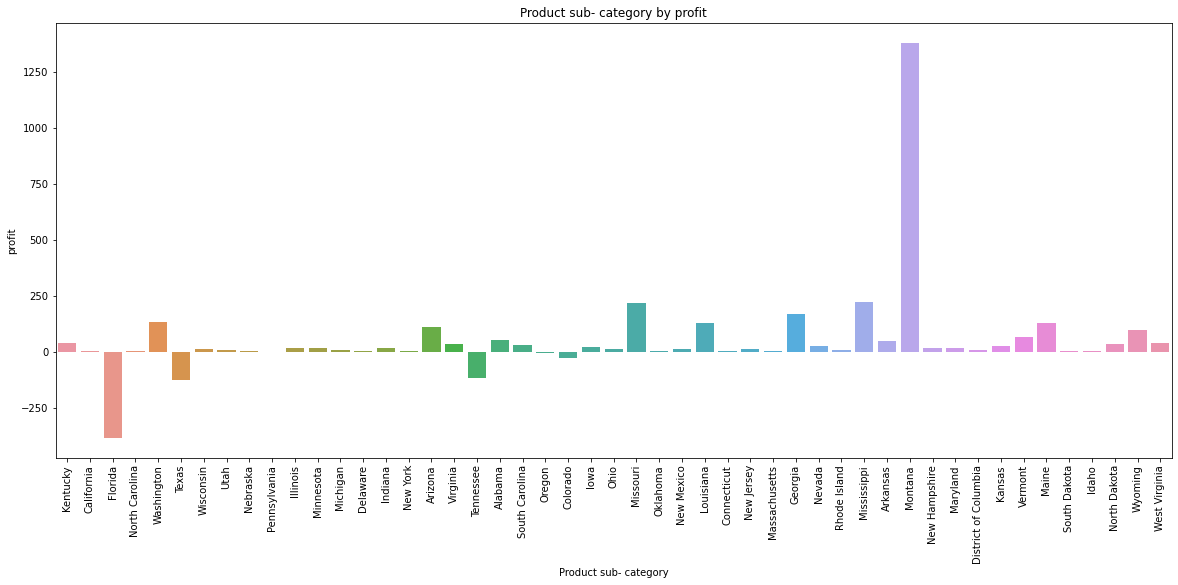

In [106]:
plt.figure(figsize = [20,8])
sns.barplot(x = State.State, y = State.profit)
plt.xticks(rotation = 90)
plt.title('Product sub- category by profit')
plt.xlabel('Product sub- category')
plt.ylabel('profit')
plt.show()

<AxesSubplot:>

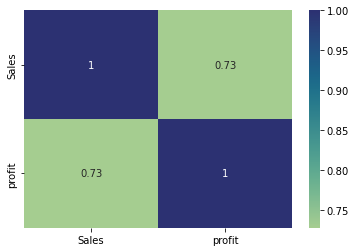

In [107]:
sns.heatmap(State[['Sales','profit']].corr(), cmap="crest", annot=True)

Extracting customer segments which recorded __profit__

In [108]:
state_profit = 'SELECT \
               State,Sales-Profit AS Order_price, Sales, profit\
                FROM `sample_-_superstore`\
                GROUP BY State\
                HAVING Order_price < Sales'
state_profit = pd.read_sql_query(state_profit, conn)
state_profit.head()

,State,Order_price,Sales,profit
0,Kentucky,220.0464,261.960,41.9136
1,California,7.7486,14.620,6.8714
2,North Carolina,10.1088,15.552,5.4432
3,Washington,275.3838,407.976,132.5922
4,Wisconsin,652.5624,665.880,13.3176


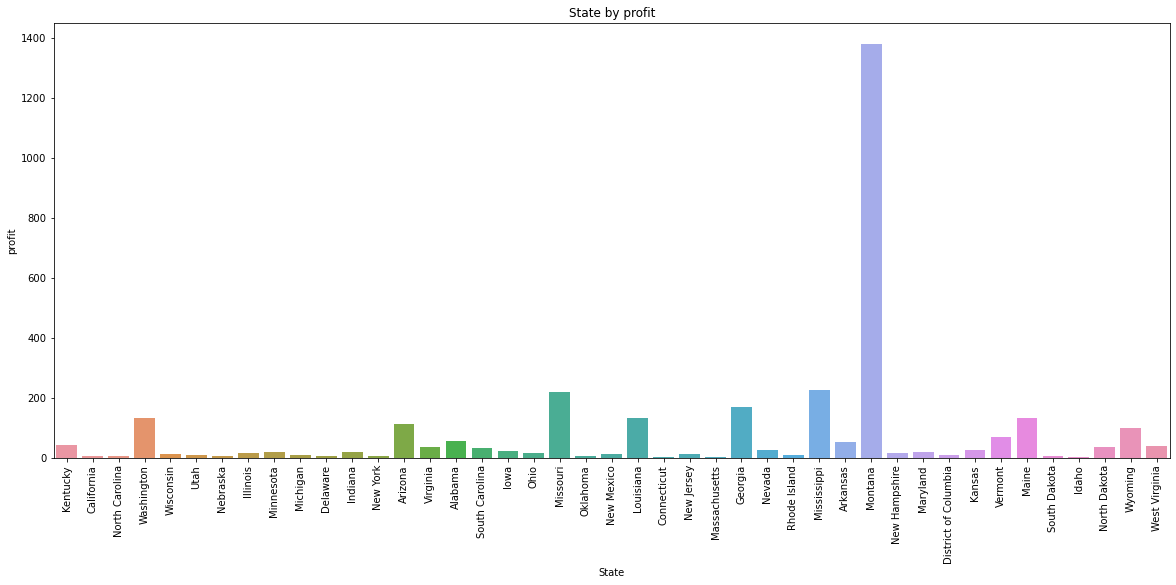

In [109]:
plt.figure(figsize = [20,8])
sns.barplot(x = state_profit.State, y = state_profit.profit)
plt.xticks(rotation = 90)
plt.title('State by profit')
plt.xlabel('State')
plt.ylabel('profit')
plt.show()

### - Insight
__Montana__ was the highest sate with __1400__ profit.

Extracting customer segments which recorded __loss__

In [110]:
state_loss = 'SELECT \
           State,Sales-Profit AS Order_price, Sales, profit\
            FROM `sample_-_superstore`\
            GROUP BY State\
            HAVING Order_price > Sales'
state_loss = pd.read_sql_query(state_loss, conn)
state_loss.head()

,State,Order_price,Sales,profit
0,Florida,1340.6085,957.5775,-383.0310
1,Texas,192.6680,68.8100,-123.8580
2,Pennsylvania,72.3916,71.3720,-1.0196
3,Tennessee,946.3272,831.9360,-114.3912
4,Oregon,9.4700,5.6820,-3.7880


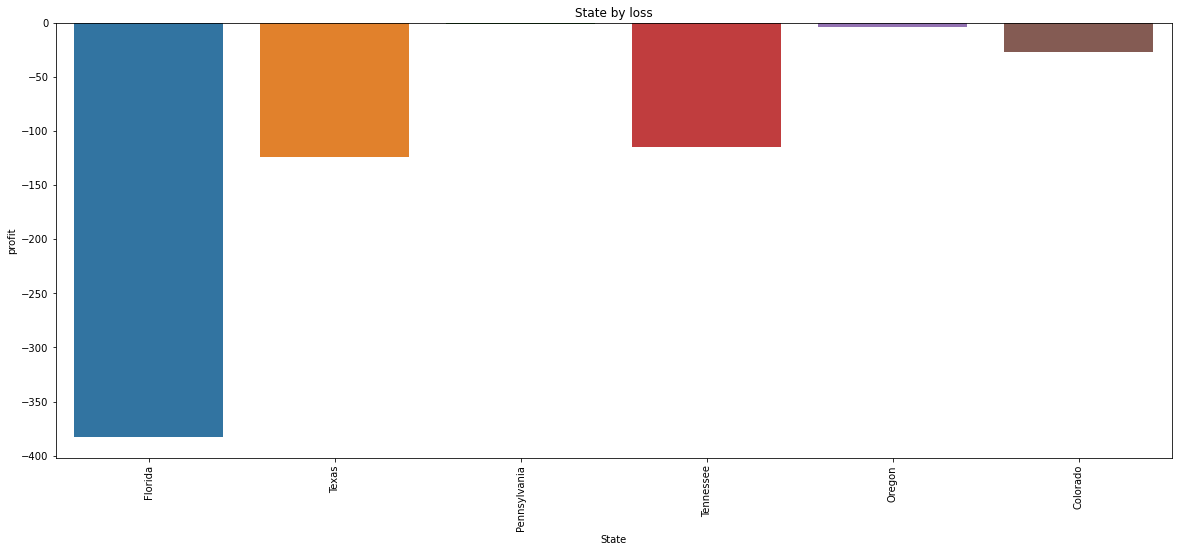

In [111]:
plt.figure(figsize = [20,8])
sns.barplot(x = state_loss.State, y = state_loss.profit)
plt.xticks(rotation = 90)
plt.title('State by loss')
plt.xlabel('State')
plt.ylabel('profit')
plt.show()

### - Insight
__Florida__ recorded the worst loss of over __400__

### 1.3.5 Analysis of customer location from SQL table 

In [112]:
location = 'SELECT \
            `Order ID`,Country, City, State, Region \
            FROM `sample_-_superstore`'
location = pd.read_sql_query(location, conn)
location.head()

,Order ID,Country,City,State,Region
0,CA-2016-152156,United States,Henderson,Kentucky,South
1,CA-2016-152156,United States,Henderson,Kentucky,South
2,CA-2016-138688,United States,Los Angeles,California,West
3,US-2015-108966,United States,Fort Lauderdale,Florida,South
4,US-2015-108966,United States,Fort Lauderdale,Florida,South


In [113]:
Country = 'SELECT \
           COUNT(DISTINCT Country) AS `Unique countries`, \
           COUNT(DISTINCT City) AS `Unique cities`, \
           COUNT(DISTINCT State) AS `Unique states`, \
           COUNT(DISTINCT Region) AS `Unique regions` \
           FROM `sample_-_superstore`'
Country = pd.read_sql_query(Country, conn)
Country

,Unique countries,Unique cities,Unique states,Unique regions
0,1,529,49,4


We can take a look at the regions

In [114]:
Region = 'SELECT \
          DISTINCT Region \
          FROM `sample_-_superstore`'
Region = pd.read_sql_query(Region, conn)
Region

,Region
0,South
1,West
2,Central
3,East


## 2. Product analysis

In [115]:
product = 'SELECT \
           `Order ID`, `Product ID`, `Order Date`, `Ship Date`, `Ship Mode`, Category, `Sub-Category`, `Product Name`\
           FROM `sample_-_superstore`'
product = pd.read_sql_query(product, conn)
product.head()

,Order ID,Product ID,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name
0,CA-2016-152156,FUR-BO-10001798,11/8/2016,11/11/2016,Second Class,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,FUR-CH-10000454,11/8/2016,11/11/2016,Second Class,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,OFF-LA-10000240,6/12/2016,6/16/2016,Second Class,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,FUR-TA-10000577,10/11/2015,10/18/2015,Standard Class,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,OFF-ST-10000760,10/11/2015,10/18/2015,Standard Class,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [116]:
product = 'SELECT \
           COUNT(DISTINCT `Order Date`) AS `distinct order dates`,\
           COUNT(DISTINCT `Product Name`) AS `distinct products`,\
           COUNT(DISTINCT `Sub-Category`) AS `Sub-Category`, \
           COUNT(DISTINCT `Product Name`) AS `Product Name`, \
           COUNT(DISTINCT `Product ID`) AS `product IDs`, \
           COUNT(DISTINCT `Order ID`) AS `Order ID`\
           FROM `sample_-_superstore`'
product = pd.read_sql_query(product, conn)
product

,distinct order dates,distinct products,Sub-Category,Product Name,product IDs,Order ID
0,1232,1798,17,1798,1812,4931


We have __4931__ orders in total

In [117]:
sales = 'SELECT  \
         SUM(Sales) AS `Total sales`,  \
         SUM(Quantity) AS `Total Quantities`, \
         SUM(Discount) AS `Total Discounts`,  \
         SUM(Profit) AS `Total Profit` \
         FROM `sample_-_superstore`'
sales = pd.read_sql_query(sales, conn)
sales

,Total sales,Total Quantities,Total Discounts,Total Profit
0,2.272450e+06,36749.0,1504.19,282857.7542


In [118]:
sales = 'SELECT  \
         AVG(Sales) AS `Total sales`,  \
         AVG(Quantity) AS `Total Quantities`, \
         AVG(Discount) AS `Total Discounts`,  \
         AVG(Profit) AS `Total Profit` \
         FROM `sample_-_superstore`'
sales = pd.read_sql_query(sales, conn)
sales

,Total sales,Total Quantities,Total Discounts,Total Profit
0,234.418182,3.7909,0.155167,29.178642


### 2.1 Product Quantity Analysis using SQL and Pandas

#### We first review column names of the sample super store data table 

In [119]:
table = 'SELECT * \
         FROM `sample_-_superstore`'
table = pd.read_sql_query(table, conn)
table.head(0)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


### 2.2 Product categories (amount)
We get sales numbers by product category in descending order

In [120]:
category = 'SELECT \
             `Order ID`,Category, SUM(Quantity) AS total_Quantity\
             FROM `sample_-_superstore`\
             GROUP BY Category \
             ORDER BY total_Quantity DESC'
category = pd.read_sql_query(category, conn)
category

,Order ID,Category,total_Quantity
0,CA-2016-138688,Office Supplies,21990.0
1,CA-2016-152156,Furniture,7855.0
2,CA-2014-115812,Technology,6904.0


<AxesSubplot:xlabel='Category', ylabel='total_Quantity'>

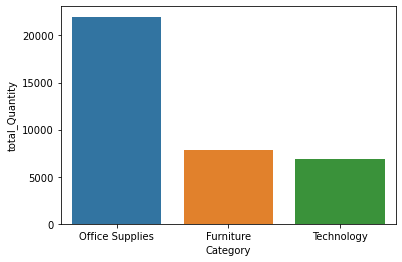

In [121]:
sns.barplot(x=category.Category,y=category.total_Quantity)

### 2.3 Product sub- category

In [122]:
Sub_Category = 'SELECT \
                 DISTINCT(`Sub-Category`) AS sub_category, SUM(Quantity) AS total_Quantity\
                 FROM `sample_-_superstore`\
                 GROUP BY `Sub-Category` \
                 ORDER BY total_Quantity DESC'
Sub_Category = pd.read_sql_query(Sub_Category, conn)
Sub_Category.head(10)

,sub_category,total_Quantity
0,Binders,5614.0
1,Paper,4811.0
2,Furnishings,3390.0
3,Phones,3254.0
4,Storage,3065.0
5,Art,3000.0
6,Accessories,2976.0
7,Chairs,2356.0
8,Appliances,1729.0
9,Labels,1400.0


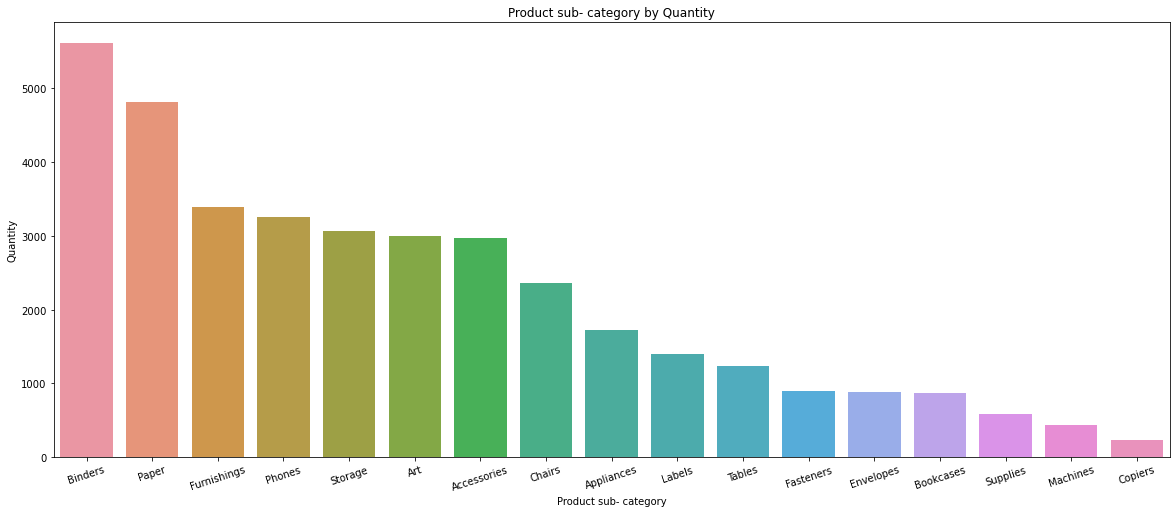

In [123]:
plt.figure(figsize = [20,8])
sns.barplot(x = Sub_Category.sub_category, y = Sub_Category.total_Quantity)
plt.xticks(rotation = 18)
plt.title('Product sub- category by Quantity')
plt.xlabel('Product sub- category')
plt.ylabel('Quantity')
plt.show()

### 2.4 Top 10 product quatities for the whole pelriod

In [124]:
Product_Name = 'SELECT \
                (`Product Name`) AS Product_Name, SUM(Quantity) AS total_Quantity\
                 FROM `sample_-_superstore`\
                 GROUP BY `Product Name` \
                 ORDER BY total_Quantity DESC'
Product_Name = pd.read_sql_query(Product_Name, conn)
Product_Name.head(10)

,Product_Name,total_Quantity
0,Staples,215.0
1,Staple envelope,170.0
2,Easy-staple paper,150.0
3,Staples in misc. colors,86.0
4,KI Adjustable-Height Table,74.0
5,Storex Dura Pro Binders,71.0
6,Avery Non-Stick Binders,71.0
7,GBC Premium Transparent Covers with Diagonal L...,67.0
8,"Situations Contoured Folding Chairs, 4/Set",64.0
9,Staple-based wall hangings,62.0


In [125]:
Product_Name['total_Quantity'] = Product_Name.nlargest(10, 'total_Quantity').total_Quantity

In [126]:
new_df=Product_Name.dropna(how='any', axis=0)
new_df

,Product_Name,total_Quantity
0,Staples,215.0
1,Staple envelope,170.0
2,Easy-staple paper,150.0
3,Staples in misc. colors,86.0
4,KI Adjustable-Height Table,74.0
5,Storex Dura Pro Binders,71.0
6,Avery Non-Stick Binders,71.0
7,GBC Premium Transparent Covers with Diagonal L...,67.0
8,"Situations Contoured Folding Chairs, 4/Set",64.0
9,Staple-based wall hangings,62.0


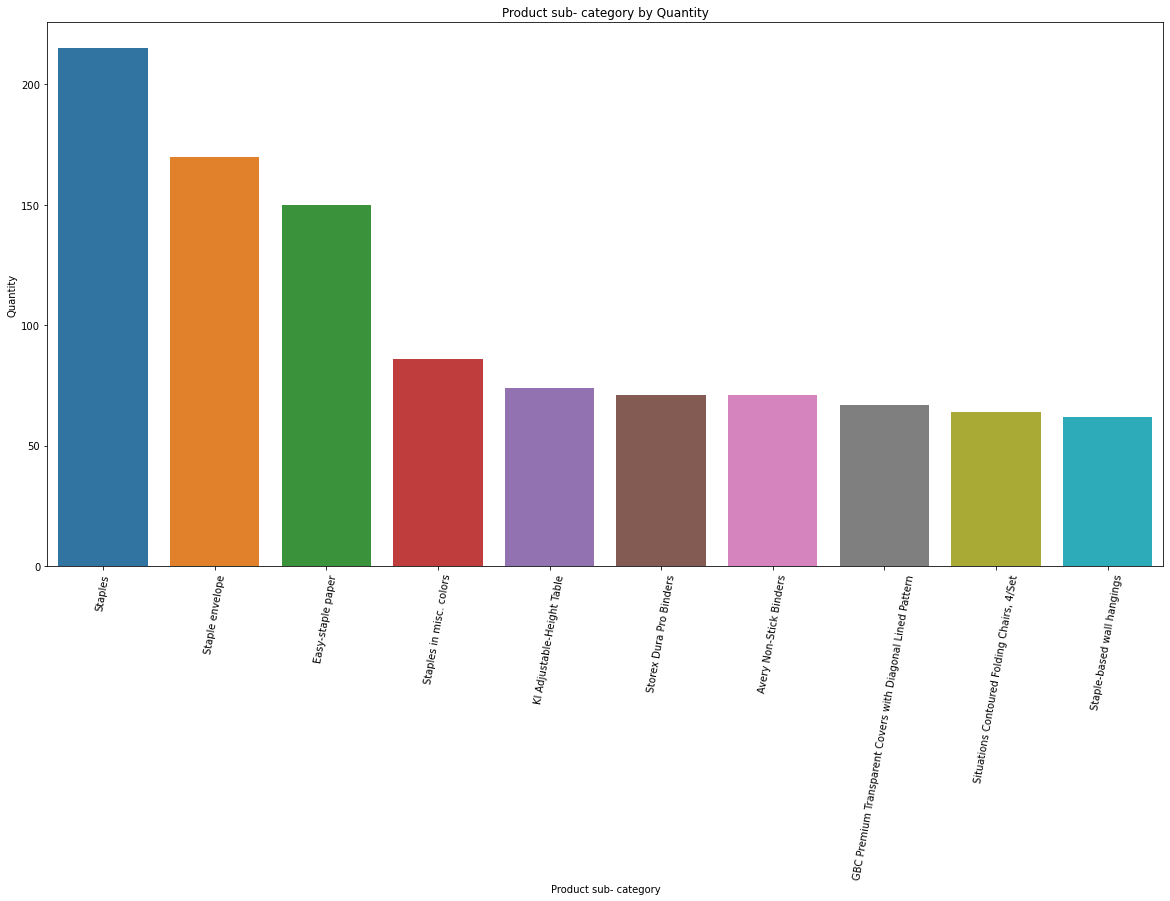

In [127]:
plt.figure(figsize = [20,10])
sns.barplot(x = new_df.Product_Name, y = new_df.total_Quantity)
plt.xticks(rotation = 80)
plt.title('Product sub- category by Quantity')
plt.xlabel('Product sub- category')
plt.ylabel('Quantity')
plt.show()

# 3. Data manipulation, feature engineering and data cleaning

Based on the results from the previous chapters, __exploratory data analysis__ of sales and profit by sub-category indicates a negative correlation. This means that the store is likely to make losses based on the sub-categories of products. We need to impliment sales-profit time series analysis.

## 3.1 Sales and profit analysis

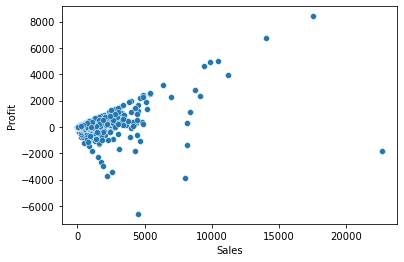

In [128]:
sns.scatterplot(table.Sales, table.Profit)
plt.show()

From the scatterplot above, there exists outliers in the sales and profit data points. The relationship is also non-linear

<AxesSubplot:>

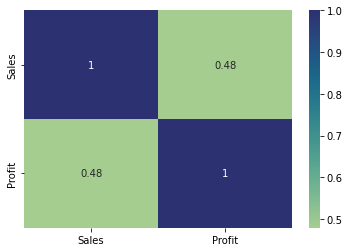

In [129]:
sns.heatmap(table[['Sales','Profit']].corr(), cmap="crest", annot=True)

From the above correlation matrix, it can be noticed that there is a positive but relatively weak correlation between sales and profit.

## 3.2 Sales volume and profit per order
In sales analytics, it is important to get an overview of sales and profit over a particular period of time.

In [130]:
Orders = 'SELECT \
           `Order ID`, SUM(Sales) AS total_sales,\
            SUM(Profit) AS total_profit \
            FROM `sample_-_superstore`\
            GROUP BY `Order ID` \
            ORDER BY 3 DESC'
Orders = pd.read_sql_query(Orders, conn)
Orders.head()

,Order ID,total_sales,total_profit
0,CA-2016-118689,18302.37,8745.5478
1,CA-2017-140151,14052.48,6734.4720
2,CA-2017-166709,10499.97,5039.9856
3,CA-2016-117121,9892.74,4946.3700
4,CA-2014-116904,9900.19,4668.6935


## 3.3 Sale volume and profit per city

In [131]:
City = 'SELECT \
         City,`Sub-Category`, SUM(Sales) AS total_sales,\
         SUM(Profit) AS total_profit \
         FROM `sample_-_superstore`\
         GROUP BY City \
         ORDER BY 3 DESC'
City = pd.read_sql_query(City, conn)
City.head()

,City,Sub-Category,total_sales,total_profit
0,New York City,Fasteners,255248.969,61624.0582
1,Los Angeles,Labels,173168.865,29806.9159
2,Seattle,Binders,117772.584,28868.9957
3,San Francisco,Art,110917.036,17176.6685
4,Philadelphia,Chairs,107486.470,-13732.3392


## 3.4 Highest sales for each Region

In [132]:
highest_sales = 'SELECT \
        DISTINCT(Region), MAX(Sales) AS highest_sales\
         FROM `sample_-_superstore`\
         GROUP BY Region'
highest_sales = pd.read_sql_query(highest_sales, conn)
highest_sales

,Region,highest_sales
0,South,22638.480
1,West,13999.960
2,Central,17499.950
3,East,11199.968


## 3.5 Highest sales record of each product

In [133]:
highest_sales = 'SELECT \
        DISTINCT(Category), MAX(Sales) AS highest_sales, MAX(Profit) AS highest_profit\
         FROM `sample_-_superstore`\
         GROUP BY Category\
         ORDER BY highest_sales'
highest_sales = pd.read_sql_query(highest_sales, conn)
highest_sales

,Category,highest_sales,highest_profit
0,Furniture,4416.174,1013.127
1,Office Supplies,9892.740,4946.370
2,Technology,22638.480,8399.976


### 3.5.1 Highest total sales for the whole period

In [134]:
sales = 'SELECT \
        City,Category,`Order Date`, SUM(Sales) AS total_sales,\
        SUM(Profit) AS total_profit \
        FROM `sample_-_superstore`\
        GROUP BY Category \
        ORDER BY total_sales DESC'
sales = pd.read_sql_query(sales, conn)
sales

,City,Category,Order Date,total_sales,total_profit
0,Los Angeles,Technology,6/9/2014,835900.0670,145387.0966
1,Henderson,Furniture,11/8/2016,733046.8613,16980.7712
2,Los Angeles,Office Supplies,6/12/2016,703502.9280,120489.8864


## 3.6 Year-on-Year Sales

In [135]:
YoY = 'SELECT \
        Country,City,Category,`Sub-Category`,`Order Date`,Quantity, Sales AS total_sales,\
        Profit AS total_profit \
        FROM `sample_-_superstore`'
YoY = pd.read_sql_query(YoY, conn)
YoY.head(3)

,Country,City,Category,Sub-Category,Order Date,Quantity,total_sales,total_profit
0,United States,Henderson,Furniture,Bookcases,11/8/2016,2,261.96,41.9136
1,United States,Henderson,Furniture,Chairs,11/8/2016,3,731.94,219.5820
2,United States,Los Angeles,Office Supplies,Labels,6/12/2016,2,14.62,6.8714


In [136]:
YoY.dtypes

Country          object
City             object
Category         object
Sub-Category     object
Order Date       object
Quantity          int64
total_sales     float64
total_profit    float64
dtype: object

###  3.6.1 Converting date column to datetime datatype (using pandas)

In [137]:
import datetime

In [138]:
YoY["Order Date"]=pd.to_datetime(YoY["Order Date"])

In [139]:
YoY.dtypes

Country                 object
City                    object
Category                object
Sub-Category            object
Order Date      datetime64[ns]
Quantity                 int64
total_sales            float64
total_profit           float64
dtype: object

### 3.6.2 Change date to standard date format

In [140]:
YoY["Order Date"]=pd.to_datetime(YoY["Order Date"], format='%Y%m%d')

In [141]:
YoY[["Order Date"]].head(3)

,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12


In [142]:
YoY.head(3)

,Country,City,Category,Sub-Category,Order Date,Quantity,total_sales,total_profit
0,United States,Henderson,Furniture,Bookcases,2016-11-08,2,261.96,41.9136
1,United States,Henderson,Furniture,Chairs,2016-11-08,3,731.94,219.5820
2,United States,Los Angeles,Office Supplies,Labels,2016-06-12,2,14.62,6.8714


### 3.6.3 Adding the attribute Month to YoY table

The dataframe below will be exported to __power BI__ for building an interactive dashboard.

In [143]:
# import datetime as dt
from datetime import datetime as dt

# concat month number to the original dataframe
YoY["month_number"]=YoY['Order Date'].dt.month

# concat month name to the original dataframe
YoY["month_name"]=YoY['Order Date'].dt.month_name()

# concat year to the original dataframe
YoY["Year"]=YoY['Order Date'].dt.to_period('Y')

YoY.head(3)

,Country,City,Category,Sub-Category,Order Date,Quantity,total_sales,total_profit,month_number,month_name,Year
0,United States,Henderson,Furniture,Bookcases,2016-11-08,2,261.96,41.9136,11,November,2016
1,United States,Henderson,Furniture,Chairs,2016-11-08,3,731.94,219.5820,11,November,2016
2,United States,Los Angeles,Office Supplies,Labels,2016-06-12,2,14.62,6.8714,6,June,2016


In [144]:
#exporting DataFrame to excel sheet 

#YoY.to_excel("superstore.xlsx")

### 3.6.4 Breaking down  Annual and monthly sales & profit numbers  by geography

In [145]:
df_agg = YoY.groupby(['month_name','Year','City'])[['total_sales','total_profit']].agg(np.sum).reset_index()
df_agg.head()

,month_name,Year,City,total_sales,total_profit
0,April,2014,Alexandria,4251.920,112.2737
1,April,2014,Arlington,129.330,60.9174
2,April,2014,Athens,1220.670,341.3824
3,April,2014,Austin,758.352,265.4232
4,April,2014,Baltimore,534.790,145.3746


### 3.6.5 Breaking down  Annual and monthly sales & profit numbers  by product sub-category

In [146]:
df = YoY.groupby(['month_name','Year','Sub-Category'])[['total_sales','total_profit']].agg(np.sum).reset_index()
df.head()

,month_name,Year,Sub-Category,total_sales,total_profit
0,April,2014,Accessories,2545.990,736.1707
1,April,2014,Appliances,532.580,149.8012
2,April,2014,Art,567.916,157.7972
3,April,2014,Binders,901.896,-301.8911
4,April,2014,Bookcases,308.499,-18.1470


# 4. Analysis of results from Power BI

## 4.1 Dashboard one

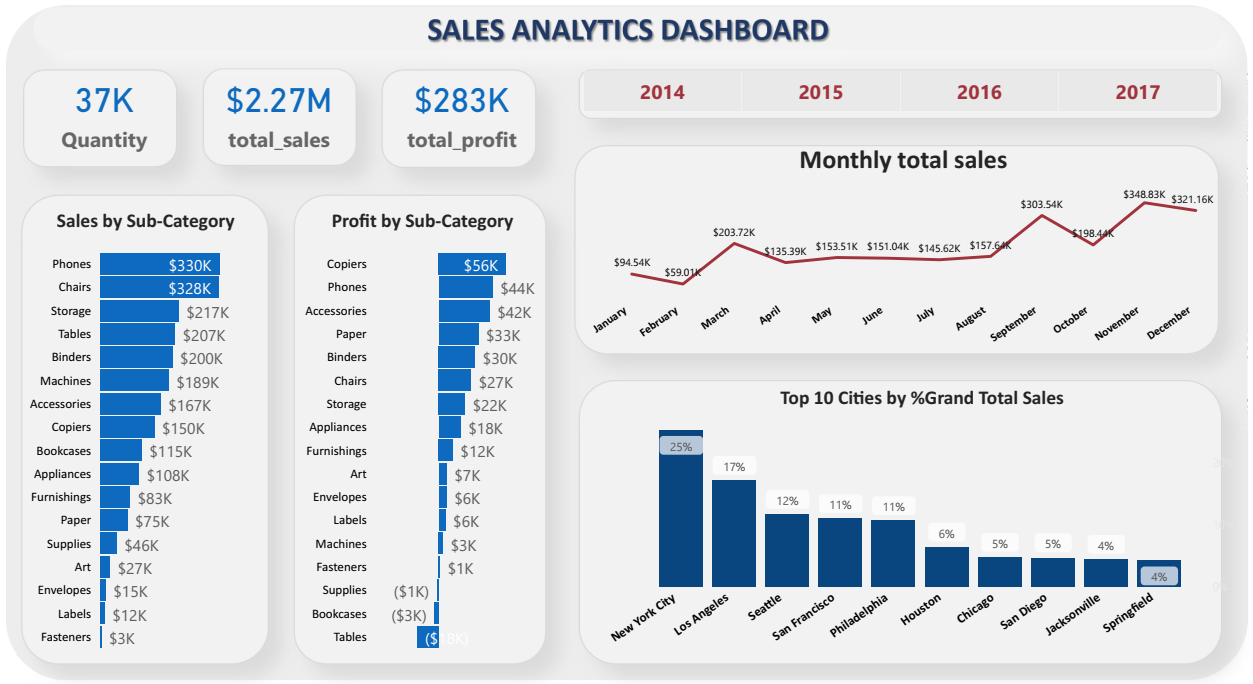

### Analysis
 On average, the monthly total sales keep on improving on a yearly basis. However, the overall analysis of sales by sub-category indicates that supplies, Bookcases and Tables sub-categories recorded negative profit which indicates loss.<br>
### Recommendation 
The sales manager should consider the business model used by the __New York City__ store sale manager which indicates the highest grand total percentage share of __25%__ of the __top 10 Cities by sales__ for the latest year past three years.

__Breakingdown the product sub-category into products with loss.__

## 4.2 Dashboard two

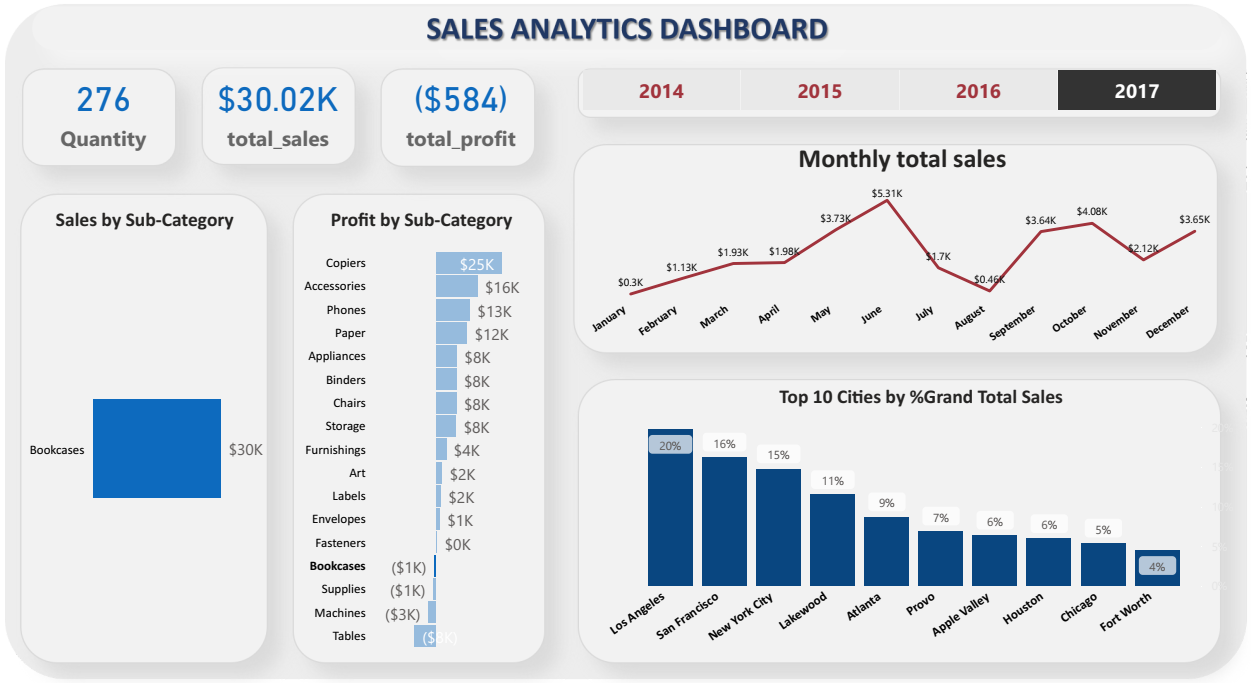

### -	Insight
The business model used by the Los Angeles branch manager can be used to improve __Bookcases__ sales in other branches as it recorded __20%__ of the __top 10 Cities by grand total sales__ of the product for the 2017 business year.


## 4.3 Dashboard three

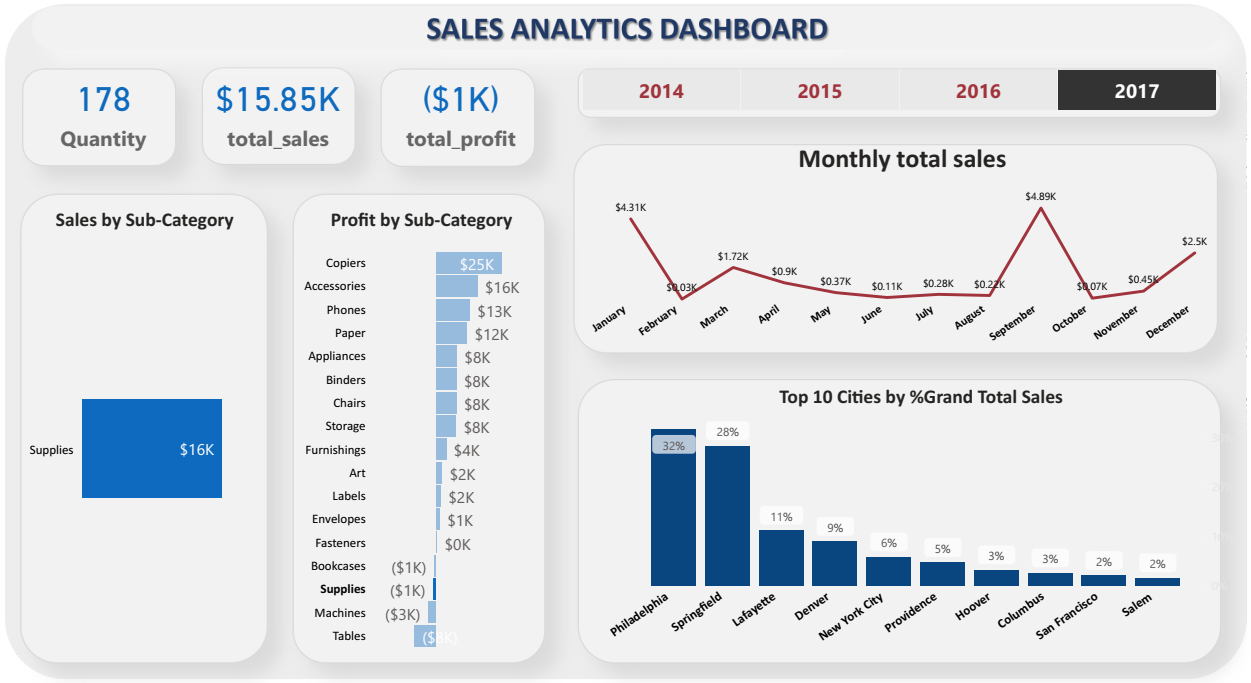

### - Insight 
The business model used by the __Philadelphia__ branch manager can be used to improve __Supplies__ sales in other branches as it recorded __32%__ of the __top 10 Cities by grand total sales__ of the product for the 2017 business years. 

## 4.4 Dashboard four

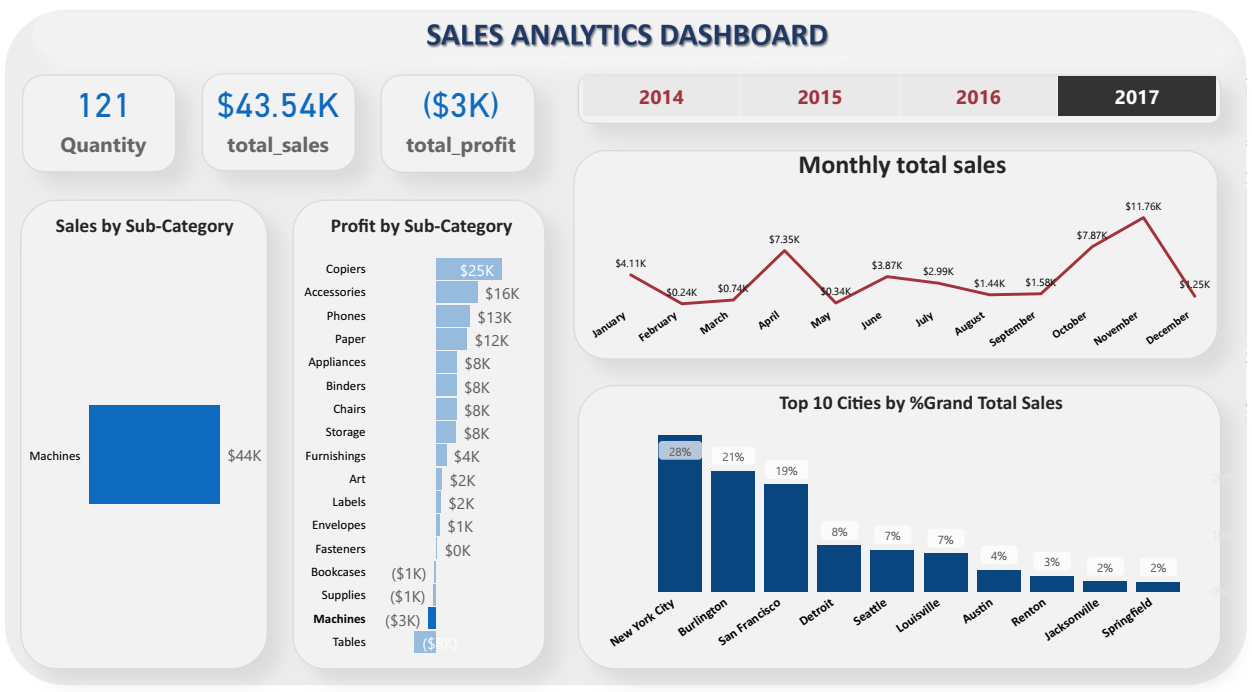

### - Insight
The business model used by the __New York City__ branch manager can be used to improve __Machines__ sales in other branches as it recorded __28%__ of the __top 10 Cities by grand total sales__ of the product for the 2017 business years.  

## 4.5 Dashboard five

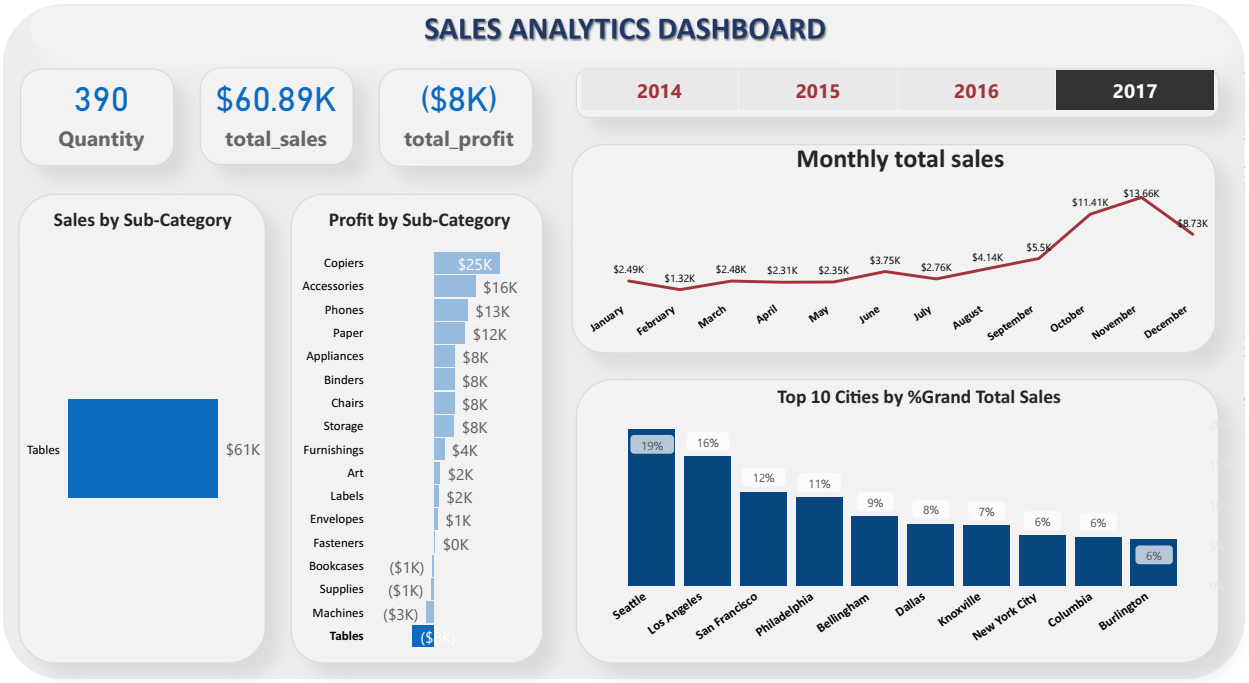

### - Insight
The business model used by the Seattle branch manager can be used to improve __Tables__ sales in other branches as it recorded __19%__ of the __top 10 Cities by grand total sales__ of the product for the 2017 business years.
